<a href="https://colab.research.google.com/github/nawidadkhah/Graph_Simulation/blob/main/Graph_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import math

mean of degrees:

mean of erdos graph:  51 
mean of watts strogatz graph: :  50 
mean of barabasi albert graph: :  50




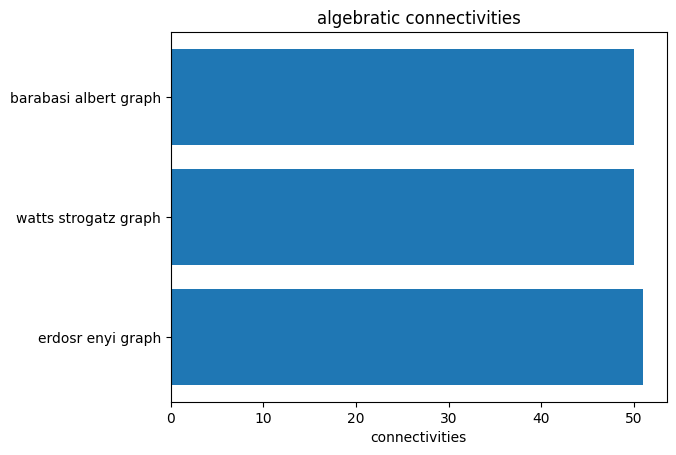

algebratic connectivity:

ER : 31.986990123591035 
WS : 32.60066882510928 
BA : 22.82990912617517




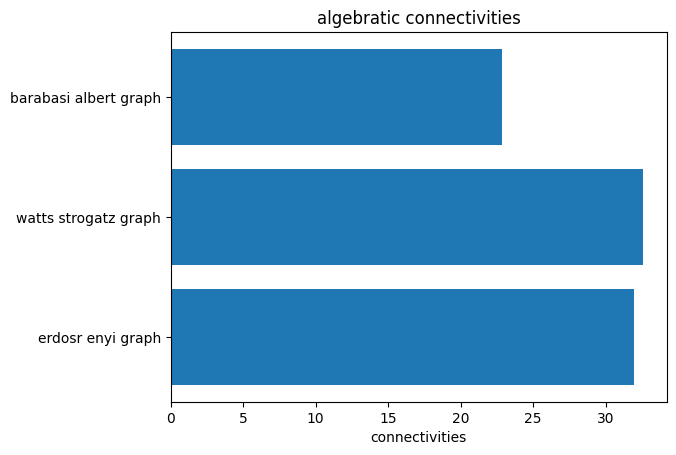

In [50]:
# algebratic connectivity
node = 100
graph =[ [nx.erdos_renyi_graph(node, .508)],
         [nx.watts_strogatz_graph(node, 50, .3)],
         [nx.barabasi_albert_graph(node, 50)]]

number_of_degrees = []
for j in range(3):
  d_list = []
  d_list = [graph[j][0].degree(n) for n in graph[j][0].nodes() ]
  sum = 0
  for i in range(len(d_list)):
    sum += d_list[i]
  number_of_degrees.append(sum)


algebratic_connectivity = []
for i in range(len(graph)):
  algebratic_connectivity.append(nx.algebraic_connectivity(graph[i][0], method="lanczos"))


print("mean of degrees:")
print("\nmean of erdos graph: " , int(number_of_degrees[0] / len(d_list)),
      "\nmean of watts strogatz graph: : " , int(number_of_degrees[1] / len(d_list)),
      "\nmean of barabasi albert graph: : " , int(number_of_degrees[2] / len(d_list)))

print("\n")
y_axis = ['erdosr enyi graph', 'watts strogatz graph', 'barabasi albert graph']
x_axis = [int(number_of_degrees[0] / len(d_list)), int(number_of_degrees[1] / len(d_list)), int(number_of_degrees[2] / len(d_list))]

plt.barh(y_axis, x_axis)
plt.title('algebratic connectivities')
plt.xlabel('connectivities')
plt.show()


print("algebratic connectivity:")
print("\nER : " + str(algebratic_connectivity[0]),
      "\nWS : " + str(algebratic_connectivity[1]),
      "\nBA : " + str(algebratic_connectivity[2]))

print("\n")
y_axis = ['erdosr enyi graph', 'watts strogatz graph', 'barabasi albert graph']
x_axis = [algebratic_connectivity[0], algebratic_connectivity[1], algebratic_connectivity[2]]

plt.barh(y_axis, x_axis)
plt.title('algebratic connectivities')
plt.xlabel('connectivities')
plt.show()

Spectral gap:

ER : 0.026734773543443446 
WS : 0.022637069668289378 
BA : 0.012120376468683802




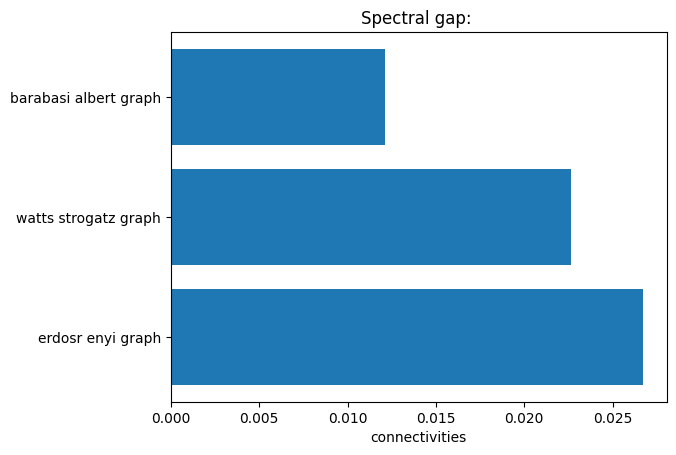

In [18]:
# Spectral gap
spectral_gap = []
for i in range(len(graph)):
  L = nx.normalized_laplacian_matrix(graph[i][0])
  e = np.linalg.eigvals(L.toarray())
  delta_y = e[len(e)-1] - e[len(e)-2]
  spectral_gap.append(delta_y)

print("Spectral gap:")
print("\nER : " + str(spectral_gap[0]),
      "\nWS : " + str(spectral_gap[1]),
      "\nBA : " + str(spectral_gap[2]))


print("\n")
y_axis = ['erdosr enyi graph', 'watts strogatz graph', 'barabasi albert graph']
x_axis = [spectral_gap[0], spectral_gap[1], spectral_gap[2]]

plt.barh(y_axis, x_axis)
plt.title('Spectral gap: ')
plt.xlabel('connectivities')
plt.show()


natural connectivity:

ER : 0.6931471805599453 
WS : 0.6931471805599453 
BA : 0.6931471805599453




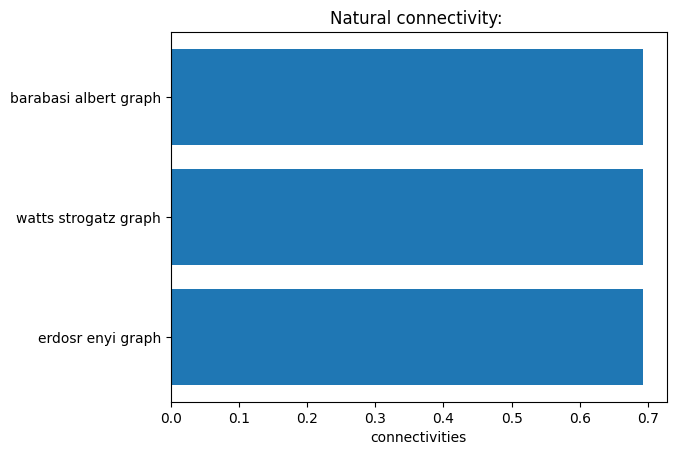

In [19]:
# natural connectivity
natu = []

for i in range(len(graph)):
  sum_natu = 0
  L = nx.normalized_laplacian_matrix(graph[i][0])
  e = np.linalg.eigvals(L.toarray())
  for i in range(len(graph[i][0])):
    sum_natu += (math.exp(e[i]) / node)
  sum_natu = math.floor(sum_natu)
  natu.append(math.log(sum_natu))

print("natural connectivity:")
print("\nER : " + str(natu[0]),
      "\nWS : " + str(natu[1]),
      "\nBA : " + str(natu[2]))

print("\n")
y_axis = ['erdosr enyi graph', 'watts strogatz graph', 'barabasi albert graph']
x_axis = [natu[0], natu[1], natu[2]]

plt.barh(y_axis, x_axis)
plt.title('Natural connectivity: ')
plt.xlabel('connectivities')
plt.show()

Energy of graph:

ER : 100.00000000000004 
WS : 100.00000000000009 
BA : 100.00000000000003




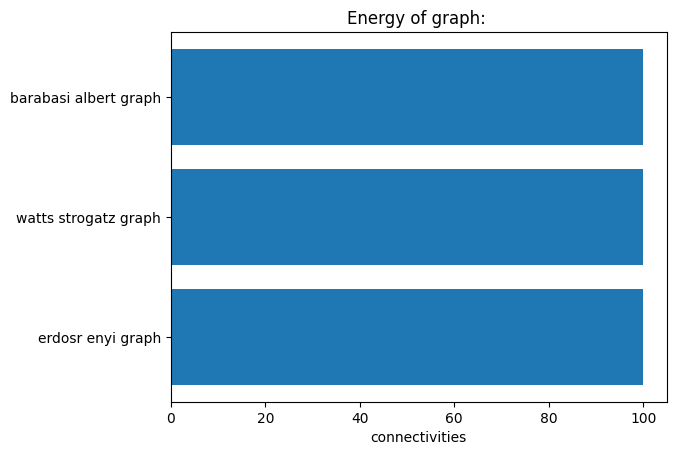

In [20]:
# energy of a graph
energy_of_graph = []
for i in range(len(graph)):
  L = nx.normalized_laplacian_matrix(graph[i][0])
  e = np.linalg.eigvals(L.toarray())
  sum = 0
  for j in range(len(e)):
     sum += abs(e[j])
  energy_of_graph.append(sum)


print("Energy of graph:")
print("\nER : " + str(energy_of_graph[0]),
      "\nWS : " + str(energy_of_graph[1]),
      "\nBA : " + str(energy_of_graph[2]))

print("\n")
y_axis = ['erdosr enyi graph', 'watts strogatz graph', 'barabasi albert graph']
x_axis = [energy_of_graph[0], energy_of_graph[1], energy_of_graph[2]]

plt.barh(y_axis, x_axis)
plt.title('Energy of graph: ')
plt.xlabel('connectivities')
plt.show()

Laplacian Energy of graph:

ER : 640.0246590618931 
WS : 230.51683967013665 
BA : 363.65358560741976




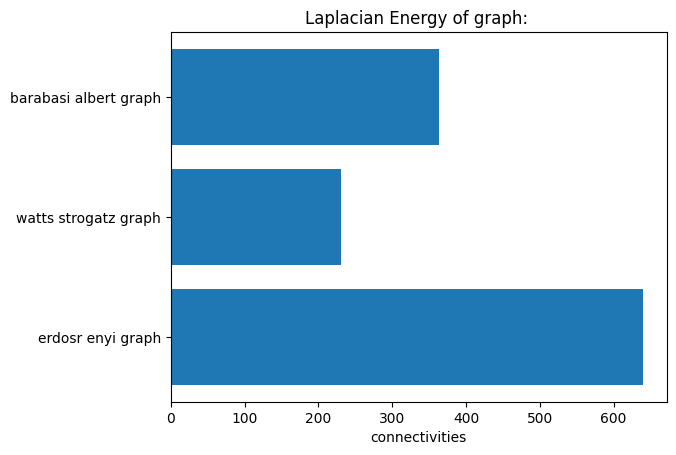

In [21]:
# laplacian energy of a graph
laplacian_energy_of_graph = []
for i in range(len(graph)):
  temp = nx.laplacian_spectrum(graph[i][0])
  edges = graph[i][0].number_of_edges()
  list_yi = []
  for j in range(len(temp)):
     yi = temp[j] - ( 2 * edges / node )
     list_yi.append(yi)
  sum = 0
  for k in range(len(list_yi)):
    sum += abs(list_yi[k])
  laplacian_energy_of_graph.append(sum)


print("Laplacian Energy of graph:")
print("\nER : " + str(laplacian_energy_of_graph[0]),
      "\nWS : " + str(laplacian_energy_of_graph[1]),
      "\nBA : " + str(laplacian_energy_of_graph[2]))

print("\n")
y_axis = ['erdosr enyi graph', 'watts strogatz graph', 'barabasi albert graph']
x_axis = [laplacian_energy_of_graph[0], laplacian_energy_of_graph[1], laplacian_energy_of_graph[2]]

plt.barh(y_axis, x_axis)
plt.title('Laplacian Energy of graph: ')
plt.xlabel('connectivities')
plt.show()